### Analyzing Kaggle 120 Years Olympics Dataset

In [61]:
# Importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Extracting from NOC_REGIONS.CSV

df_regions = pd.read_csv('./noc_regions.csv')
country_code_mapping = {}
region = df_regions['region']
codes = df_regions['NOC']
for index in range(len(codes)):
    country_code_mapping[codes[index]] = region[index]

print(country_code_mapping)

{'AFG': 'Afghanistan', 'AHO': 'Curacao', 'ALB': 'Albania', 'ALG': 'Algeria', 'AND': 'Andorra', 'ANG': 'Angola', 'ANT': 'Antigua', 'ANZ': 'Australia', 'ARG': 'Argentina', 'ARM': 'Armenia', 'ARU': 'Aruba', 'ASA': 'American Samoa', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BAH': 'Bahamas', 'BAN': 'Bangladesh', 'BAR': 'Barbados', 'BDI': 'Burundi', 'BEL': 'Belgium', 'BEN': 'Benin', 'BER': 'Bermuda', 'BHU': 'Bhutan', 'BIH': 'Bosnia and Herzegovina', 'BIZ': 'Belize', 'BLR': 'Belarus', 'BOH': 'Czech Republic', 'BOL': 'Boliva', 'BOT': 'Botswana', 'BRA': 'Brazil', 'BRN': 'Bahrain', 'BRU': 'Brunei', 'BUL': 'Bulgaria', 'BUR': 'Burkina Faso', 'CAF': 'Central African Republic', 'CAM': 'Cambodia', 'CAN': 'Canada', 'CAY': 'Cayman Islands', 'CGO': 'Republic of Congo', 'CHA': 'Chad', 'CHI': 'Chile', 'CHN': 'China', 'CIV': 'Ivory Coast', 'CMR': 'Cameroon', 'COD': 'Democratic Republic of the Congo', 'COK': 'Cook Islands', 'COL': 'Colombia', 'COM': 'Comoros', 'CPV': 'Cape Verde', 'CRC': '

In [63]:
# Extracting from ATHLETE_EVENTS.CSV

df_athletes = pd.read_csv('./athlete_events.csv')
print(df_athletes.columns)
print(df_athletes.shape)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
(271116, 15)


In [87]:
# ACCUMULATING REQUIRED DATA

countries_code = df_athletes['NOC'].unique()
countries = []
for code in countries_code : 
    if(code == 'SGP') :
        countries.append('SIN')
    else :
        countries.append(country_code_mapping[code])

gender_ratio = dict(zip(list(codes), [[0 for x in range(2)] for x in range(len(countries))]))
for name, group in df_athletes.groupby('NOC'):
    gender_ratio[(name, 'SIN')[name == 'SGP']][0] = list(group['Sex']).count('M')
    gender_ratio[(name, 'SIN')[name == 'SGP']][1] = list(group['Sex']).count('F')
    
print(gender_ratio)

# Dump...
# print(df_athletes['Sex'].value_counts(dropna = True)['F'], df_athletes['Sex'].value_counts(dropna = True)['M'])
# df_sex = df_athletes.pivot_table(index=['Sex'], columns=['NOC'], aggfunc='count')
# print(df_sex["Age"])

{'AFG': [121, 5], 'AHO': [67, 12], 'ALB': [43, 27], 'ALG': [457, 94], 'AND': [127, 42], 'ANG': [138, 129], 'ANT': [96, 37], 'ANZ': [84, 2], 'ARG': [2654, 643], 'ARM': [183, 38], 'ARU': [26, 16], 'ASA': [30, 7], 'AUS': [4889, 2749], 'AUT': [4041, 1100], 'AZE': [212, 71], 'BAH': [274, 100], 'BAN': [42, 13], 'BAR': [180, 39], 'BDI': [25, 14], 'BEL': [3253, 604], 'BEN': [57, 14], 'BER': [171, 41], 'BHU': [19, 17], 'BIH': [95, 39], 'BIZ': [67, 9], 'BLR': [993, 794], 'BOH': [151, 2], 'BOL': [116, 36], 'BOT': [83, 7], 'BRA': [2700, 1148], 'BRN': [95, 31], 'BRU': [8, 2], 'BUL': [2461, 1069], 'BUR': [29, 15], 'CAF': [51, 16], 'CAM': [46, 17], 'CAN': [6170, 3563], 'CAY': [71, 12], 'CGO': [70, 35], 'CHA': [31, 10], 'CHI': [807, 118], 'CHN': [2371, 2770], 'CIV': [135, 58], 'CMR': [218, 94], 'COD': [68, 25], 'COK': [24, 16], 'COL': [774, 295], 'COM': [11, 8], 'CPV': [9, 9], 'CRC': [199, 65], 'CRO': [640, 236], 'CRT': [11, 0], 'CUB': [1891, 588], 'CYP': [167, 58], 'CZE': [1178, 696], 'DEN': [2860, 7

Text(0.5, 1.0, 'Player Participation vs Host Country')

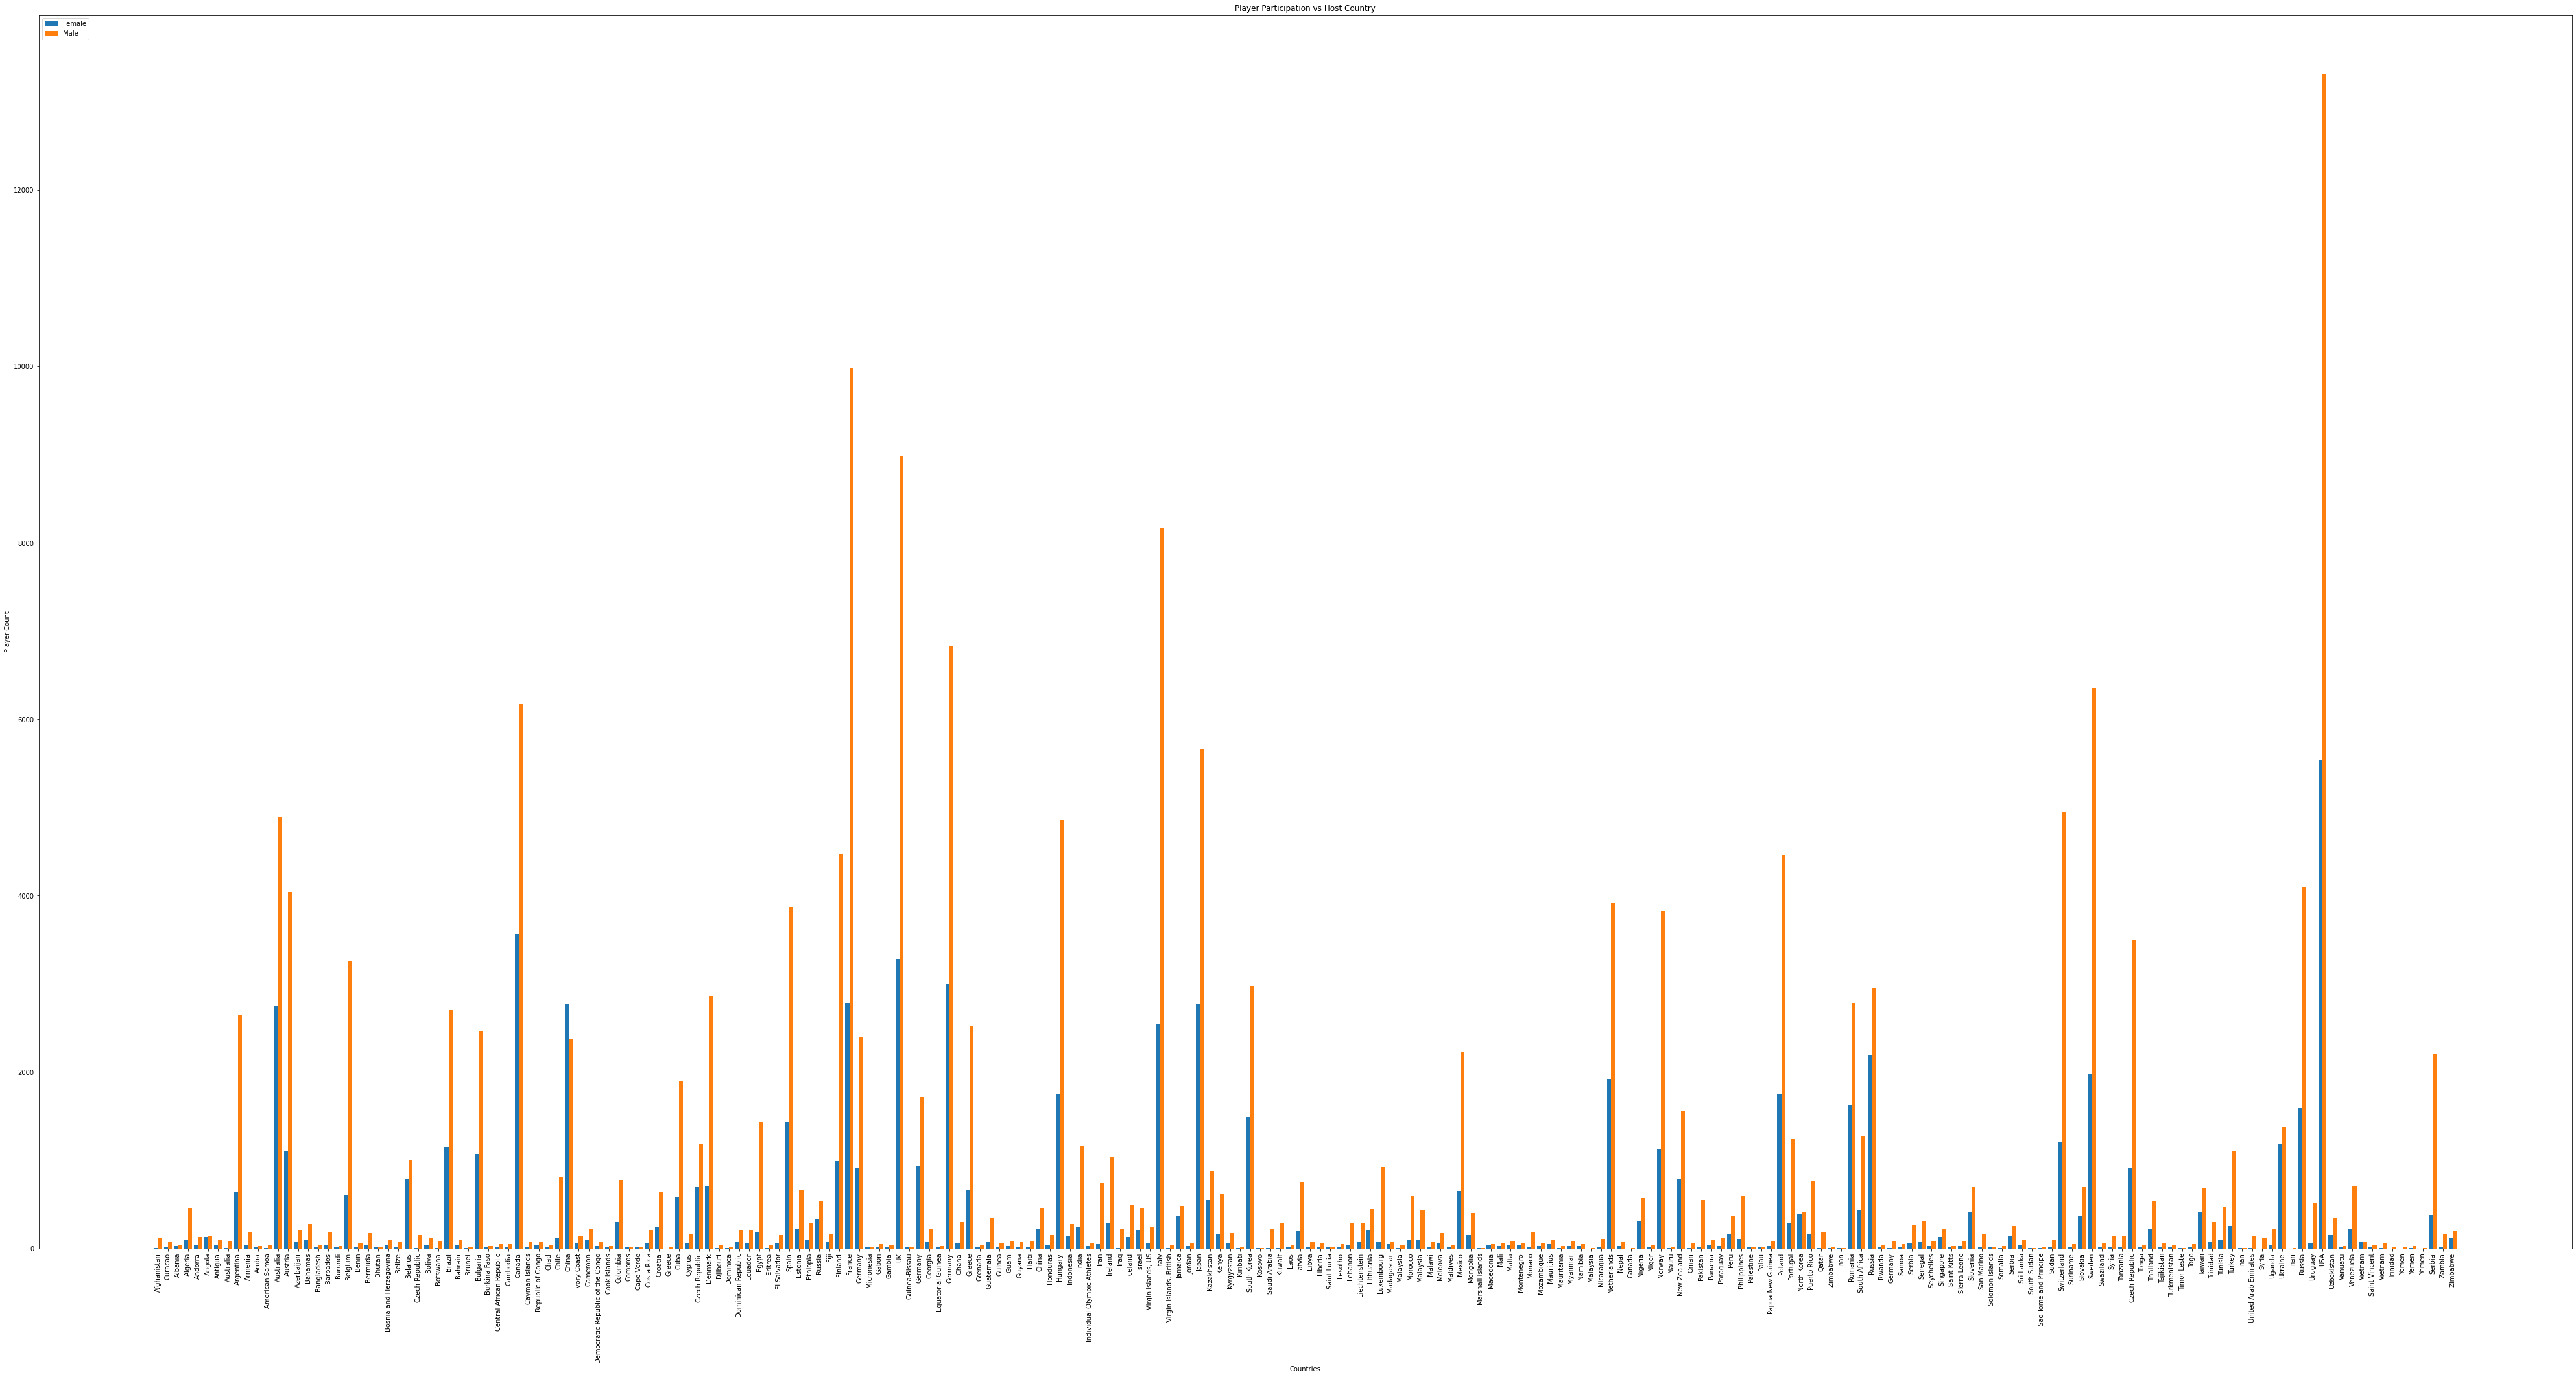

In [106]:
# Plotting the Chart

male = [pair[0] for pair in list(gender_ratio.values())]
female = [pair[1] for pair in list(gender_ratio.values())]
X_axis = np.arange(len(gender_ratio.keys()))

plt.figure(figsize=(70, 35))
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male')
plt.xticks(X_axis, list(country_code_mapping.values()), rotation='vertical')
plt.legend(['Female', 'Male'], loc='upper left')
plt.xlabel("Countries")
plt.ylabel("Player Count")
plt.title("Player Participation vs Host Country")